# Persiapan Library dan Dataset

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

In [2]:
df = pd.read_csv("Start-ups.csv")
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,73994.56,122782.75,303319.26,Florida,110352.25
1,165349.20,136897.80,471784.10,New York,192261.83
2,55493.95,103057.49,214634.81,Florida,96778.92
3,72107.60,127864.55,353183.81,New York,105008.31
4,119943.24,156547.42,256512.92,Florida,132602.65
5,91749.16,114175.79,294919.57,Florida,124266.90
6,131876.90,99814.71,362861.36,New York,156991.12
7,91992.39,135495.07,252664.93,California,134307.35
8,64664.71,139553.16,137962.62,California,107404.34
9,130298.13,145530.06,323876.68,Florida,155752.60


# Visualisasi masing-masing biaya terhadap besarnya profit

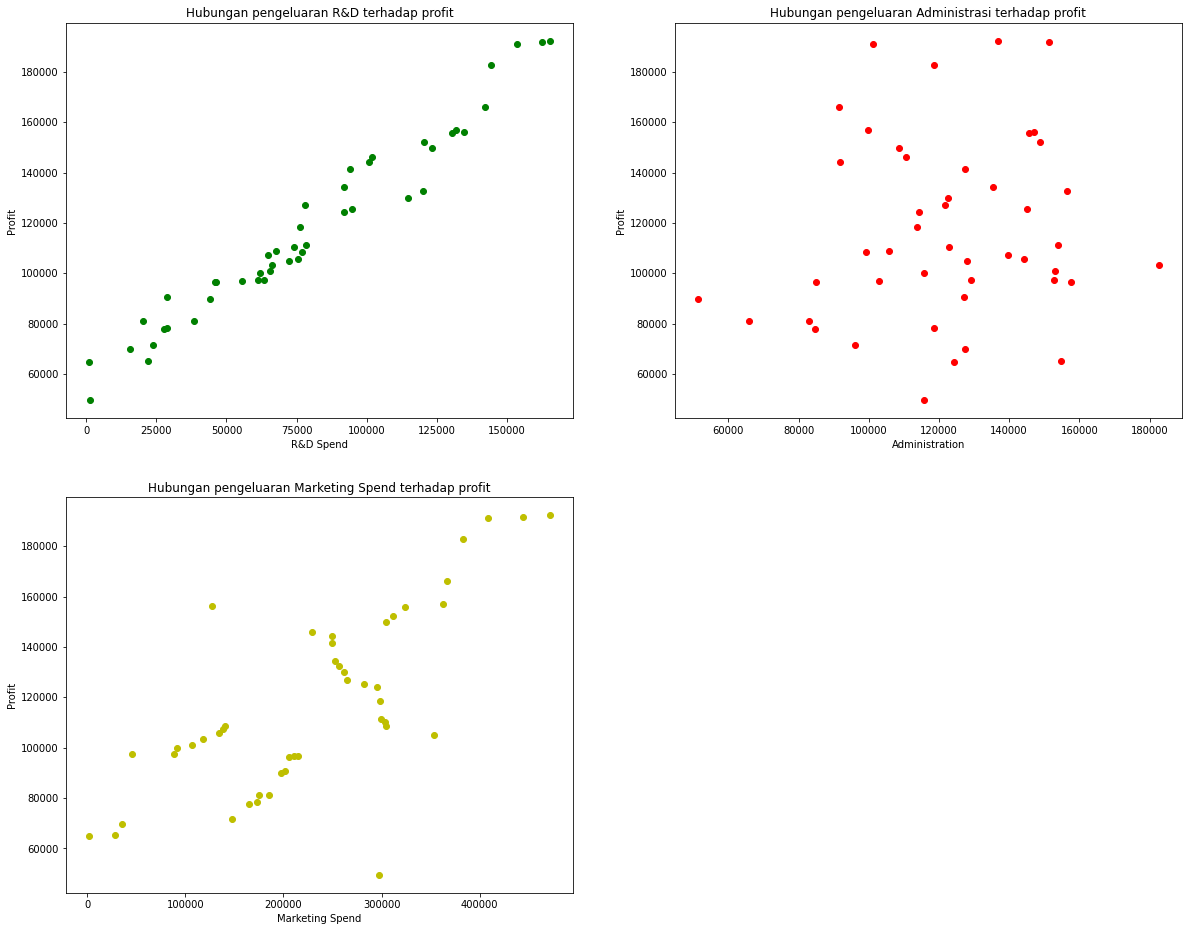

In [3]:
plt.figure(figsize=(20,16))

plt.subplot(221)
plt.title("Hubungan pengeluaran R&D terhadap profit")
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.plot(df["R&D Spend"],df["Profit"],'go')


plt.subplot(222)
plt.title("Hubungan pengeluaran Administrasi terhadap profit")
plt.xlabel('Administration')
plt.ylabel('Profit')
plt.plot(df["Administration"],df["Profit"],'ro')


plt.subplot(223)
plt.title("Hubungan pengeluaran Marketing Spend terhadap profit")
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.plot(df["Marketing Spend"],df["Profit"],'yo')

plt.show()

# Melakukan Regresi Linear

In [4]:
def count_b(x, y):
    x_bar = x.mean()
    y_bar = y.mean()
    b1 = ((x - x_bar) * (y - y_bar)).sum() / ((x - x_bar)**2).sum()
    b0 = y_bar - (b1 * x_bar)
    return b0, b1

In [5]:
def make_model(x, y):
    b0, b1 = count_b(x, y)
    def model(x):
        return b0 + (b1 * x)
    return model

def plot_regression(x, y,color):
    model = make_model(x, y)
    y_pred = model(x)
    plt.plot(x, y, color)
    plt.plot(x, y_pred)

In [6]:
def regression_interval(x, y, tingkat_kepercayaan,color):
    n = y.count()
    model = make_model(x, y)
    y_hat = model(x)
    s = (((y - y_hat) ** 2).sum() / (n - 2)) ** 0.5
    alpha = (1 - tingkat_kepercayaan) / 2
    range_ = s * stats.norm.ppf(1 - alpha)
    batas_atas = y_hat + range_
    batas_bawah = y_hat - range_
    b0, b1 = count_b(x, y)
    b0 = round(b0, 2)
    b1 = round(b1, 2)
    range_ = round(range_, 2)
    plt.figure(figsize= (10, 6))
    plt.plot(x, y, color)
    plt.plot(x, y_hat, c='b',label=f'Regresi: {b1}x + {b0}')
    plt.plot([x.min(), x.max()], [batas_atas.min(), batas_atas.max()], ls="dashed",color='red',label=f'Batas Atas: {b1}x + {round(b0 + range_, 2)}')
    plt.plot([x.min(),x.max()], [batas_bawah.min(),batas_bawah.max()], ls="dashed",color='red',label=f'Batas Bawah: {b1}x + {round(b0 - range_, 2)}')
    plt.legend()
    plt.show()

## Regresi R&D Spend (x) Terhadap Profit (y)

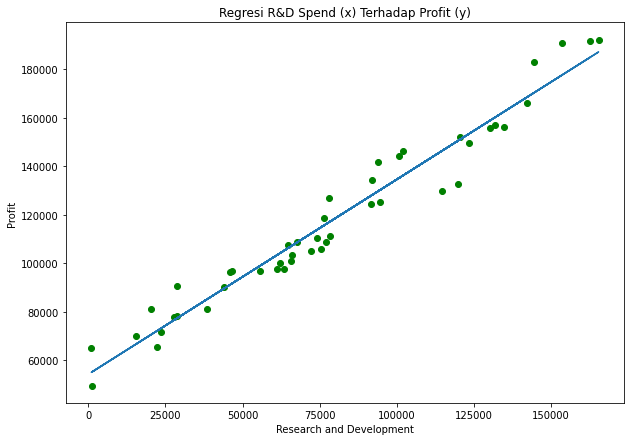

In [7]:
plt.figure(figsize=(10,7))
plt.title('Regresi R&D Spend (x) Terhadap Profit (y)')
plt.xlabel('Research and Development')
plt.ylabel('Profit')
x_rd = df.iloc[:, 0]
y = df.iloc[:,-1]
plot_regression(x_rd, y, "go")

<Figure size 1440x1152 with 0 Axes>

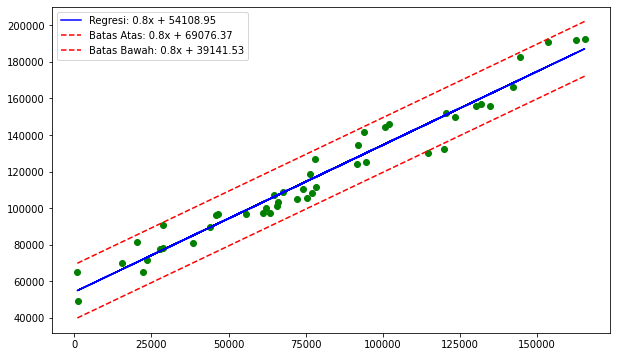

In [8]:
plt.figure(figsize=(20,16))
regression_interval(x_rd, y, 0.95,"go")

 ## Regresi Administration (x) Terhadap Profit (y)

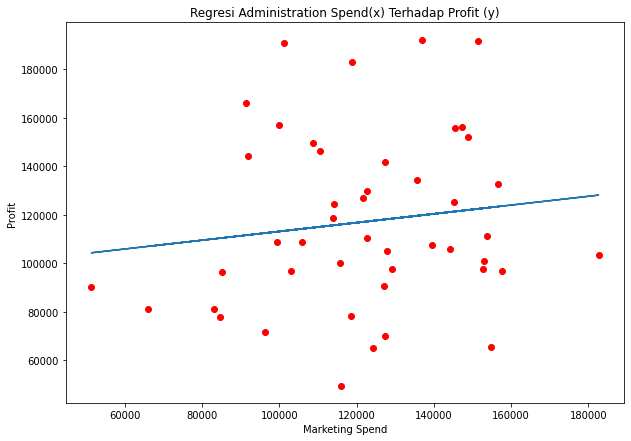

In [9]:
plt.figure(figsize=(10,7))
plt.title('Regresi Administration Spend(x) Terhadap Profit (y)')
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
x_ad = df.iloc[:, 1]
plot_regression(x_ad, y, "ro")

<Figure size 1440x1152 with 0 Axes>

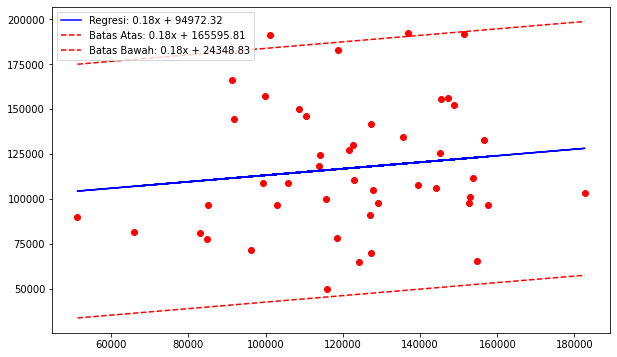

In [10]:
plt.figure(figsize=(20,16))
regression_interval(x_ad, y, 0.95,"ro")

## Regresi Marketing Spend (x) Terhadap Profit (y)

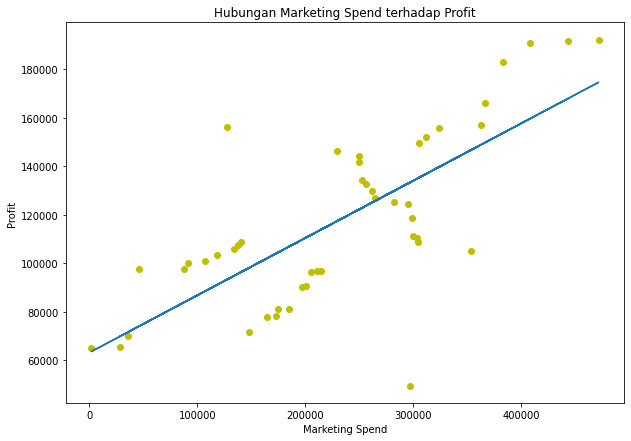

In [11]:
plt.figure(figsize=(10,7))
x_ms = df.iloc[:, 2]
plot_regression(x_ms, y, "yo")
plt.title('Hubungan Marketing Spend terhadap Profit')
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.show()

<Figure size 1440x1152 with 0 Axes>

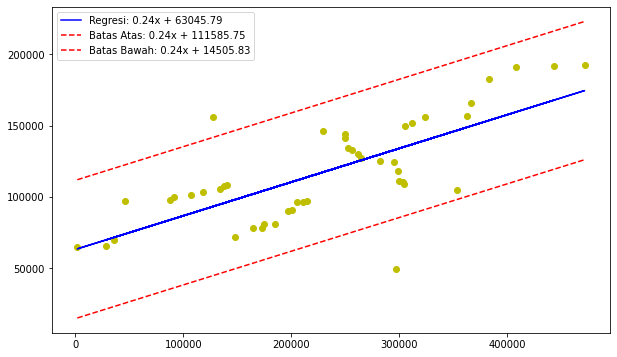

In [12]:
plt.figure(figsize=(20,16))
regression_interval(x_ms, y, 0.95,"yo")

In [13]:
def predict_interval(x, y, tingkat_kepercayaan, x_test):
    n = y.count()
    model = make_model(x, y)
    y_hat = model(x)
    s = (((y - y_hat) ** 2).sum() / (n - 2)) ** 0.5
    alpha = (1 - tingkat_kepercayaan) / 2
    range_ = s * stats.norm.ppf(1 - alpha)
    y_pred = model(x_test)
    batas_atas = y_pred + range_
    batas_bawah = y_pred - range_
    return batas_bawah, batas_atas

predict_interval(x_rd, y, 0.95, 125000)

(139719.22654012052, 169654.07003943264)

# Analisa State

In [14]:
x_ms1_florida = df[df["State"]=="Florida"]
y_ms1_florida = df[df["State"]=="Florida"]
x_ms2_new_york = df[df["State"]=="New York"]
y_ms2_new_york = df[df["State"]=="New York"]
x_ms3_california = df[df["State"]=="California"]
y_ms3_california = df[df["State"]=="California"]

## Analisa State Florida

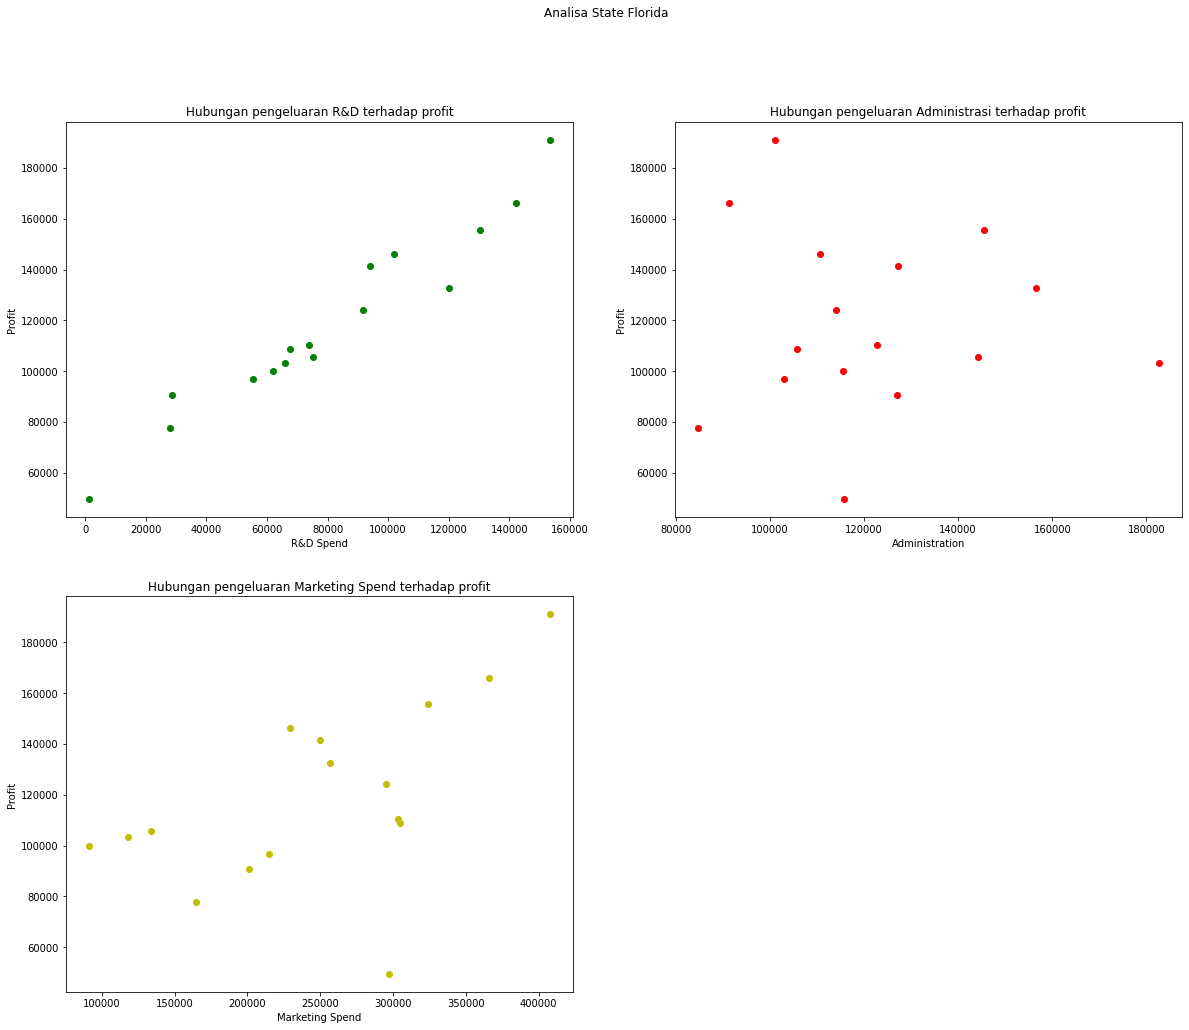

In [15]:
plt.figure(figsize=(20,16))
plt.suptitle("Analisa State Florida")
plt.subplot(221)
plt.title("Hubungan pengeluaran R&D terhadap profit")
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.plot(x_ms1_florida['R&D Spend'],y_ms1_florida['Profit'],'go')


plt.subplot(222)
plt.title("Hubungan pengeluaran Administrasi terhadap profit")
plt.xlabel('Administration')
plt.ylabel('Profit')
plt.plot(x_ms1_florida['Administration'],y_ms1_florida['Profit'],'ro')


plt.subplot(223)
plt.title("Hubungan pengeluaran Marketing Spend terhadap profit")
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.plot(x_ms1_florida['Marketing Spend'],y_ms1_florida['Profit'],'yo')

plt.show()

## Analisa State New York

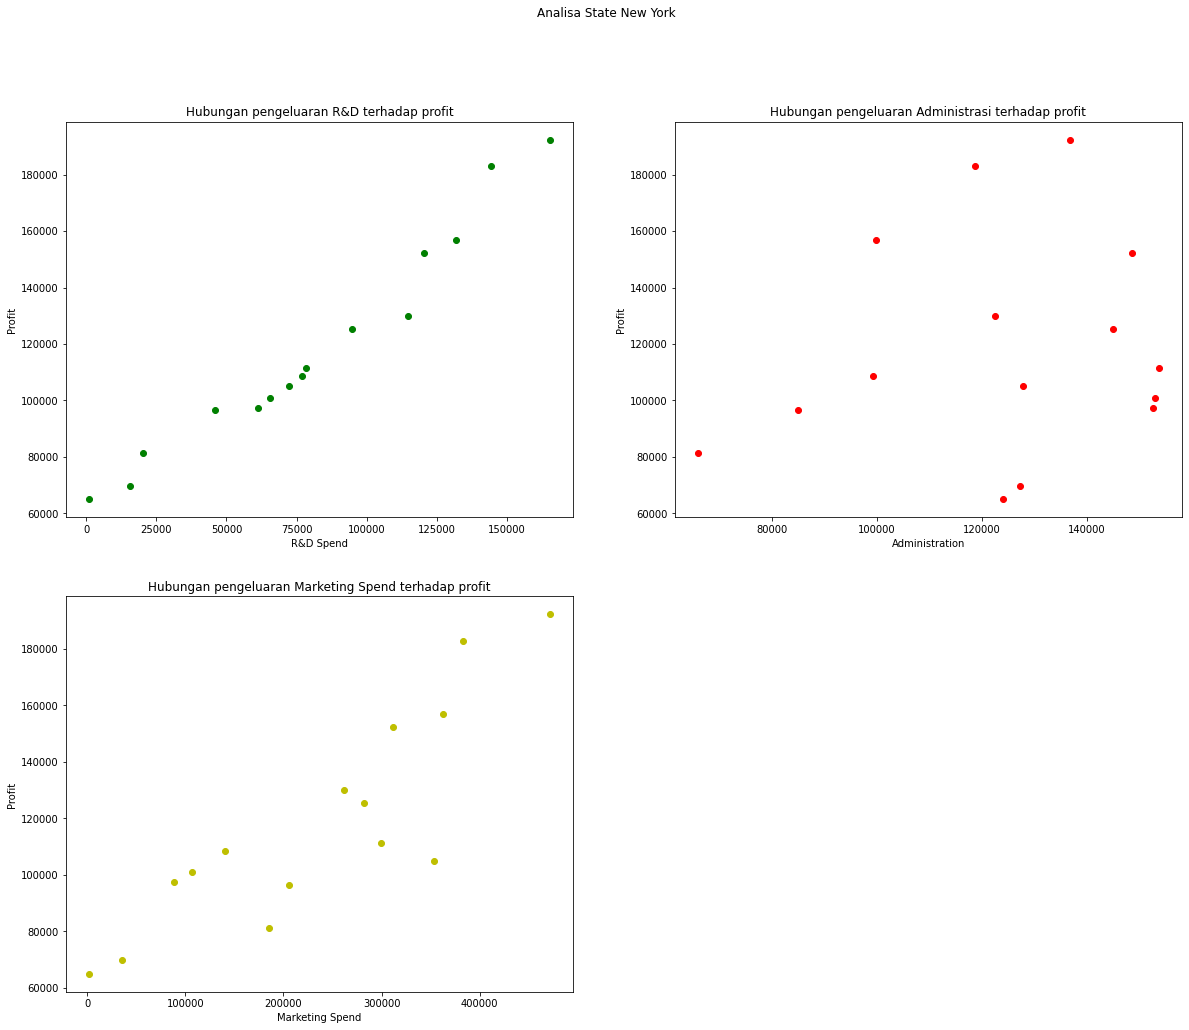

In [16]:
plt.figure(figsize=(20,16))
plt.suptitle("Analisa State New York")
plt.subplot(221)
plt.title("Hubungan pengeluaran R&D terhadap profit")
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.plot(x_ms2_new_york['R&D Spend'],y_ms2_new_york['Profit'],'go')


plt.subplot(222)
plt.title("Hubungan pengeluaran Administrasi terhadap profit")
plt.xlabel('Administration')
plt.ylabel('Profit')
plt.plot(x_ms2_new_york['Administration'],y_ms2_new_york['Profit'],'ro')


plt.subplot(223)
plt.title("Hubungan pengeluaran Marketing Spend terhadap profit")
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.plot(x_ms2_new_york['Marketing Spend'],y_ms2_new_york['Profit'],'yo')

plt.show()

## Analisa State California

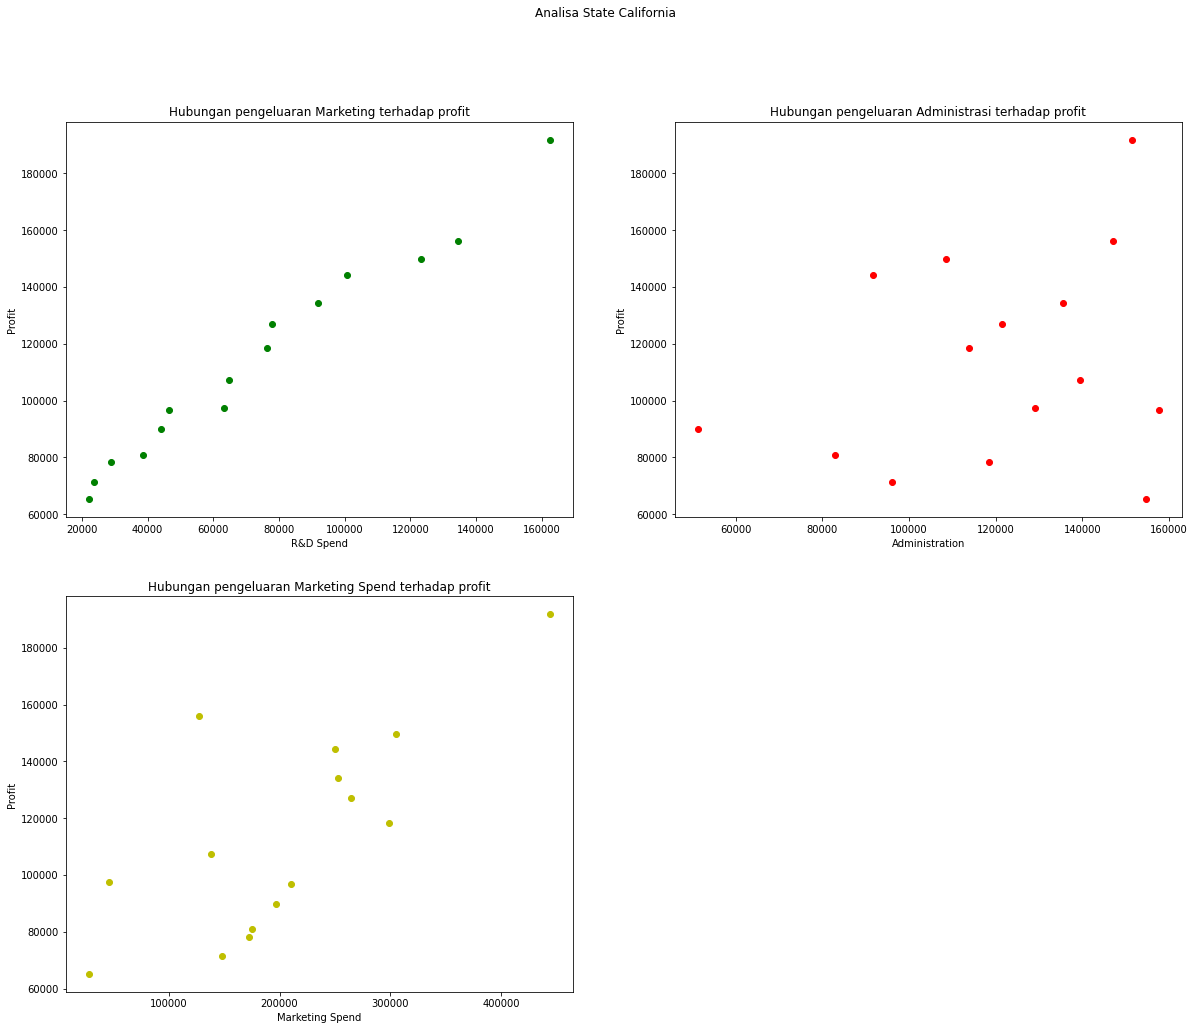

In [17]:
plt.figure(figsize=(20,16))
plt.suptitle("Analisa State California")
plt.subplot(221)
plt.title("Hubungan pengeluaran Marketing terhadap profit")
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.plot(x_ms3_california['R&D Spend'],y_ms3_california['Profit'],'go')


plt.subplot(222)
plt.title("Hubungan pengeluaran Administrasi terhadap profit")
plt.xlabel('Administration')
plt.ylabel('Profit')
plt.plot(x_ms3_california['Administration'],y_ms3_california['Profit'],'ro')


plt.subplot(223)
plt.title("Hubungan pengeluaran Marketing Spend terhadap profit")
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.plot(x_ms3_california['Marketing Spend'],y_ms3_california['Profit'],'yo')

plt.show()

# Hubungan Profit dan Dana R&D

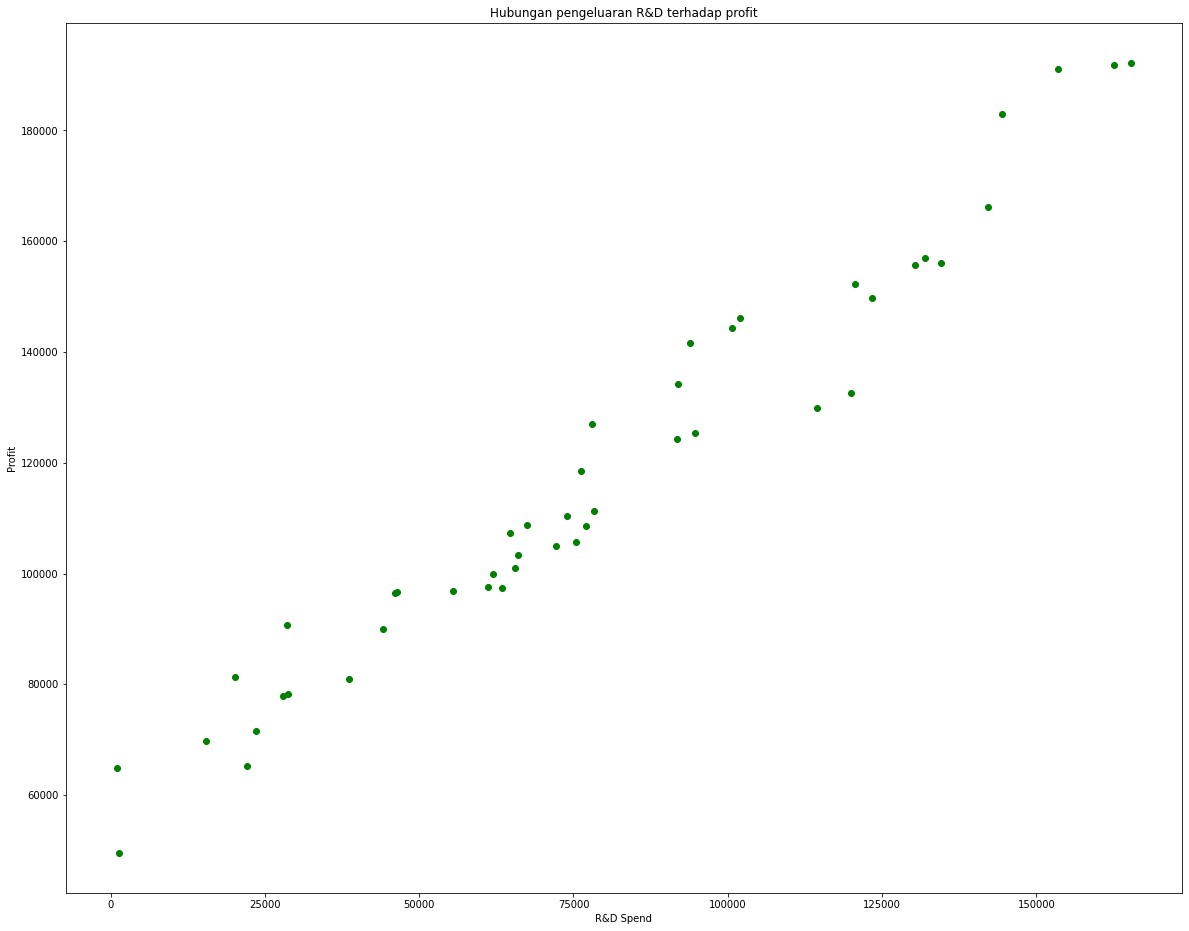

In [18]:
plt.figure(figsize=(20,16))
plt.title("Hubungan pengeluaran R&D terhadap profit")
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.plot(df["R&D Spend"],df["Profit"],'go')
plt.show()

## Model Regresi

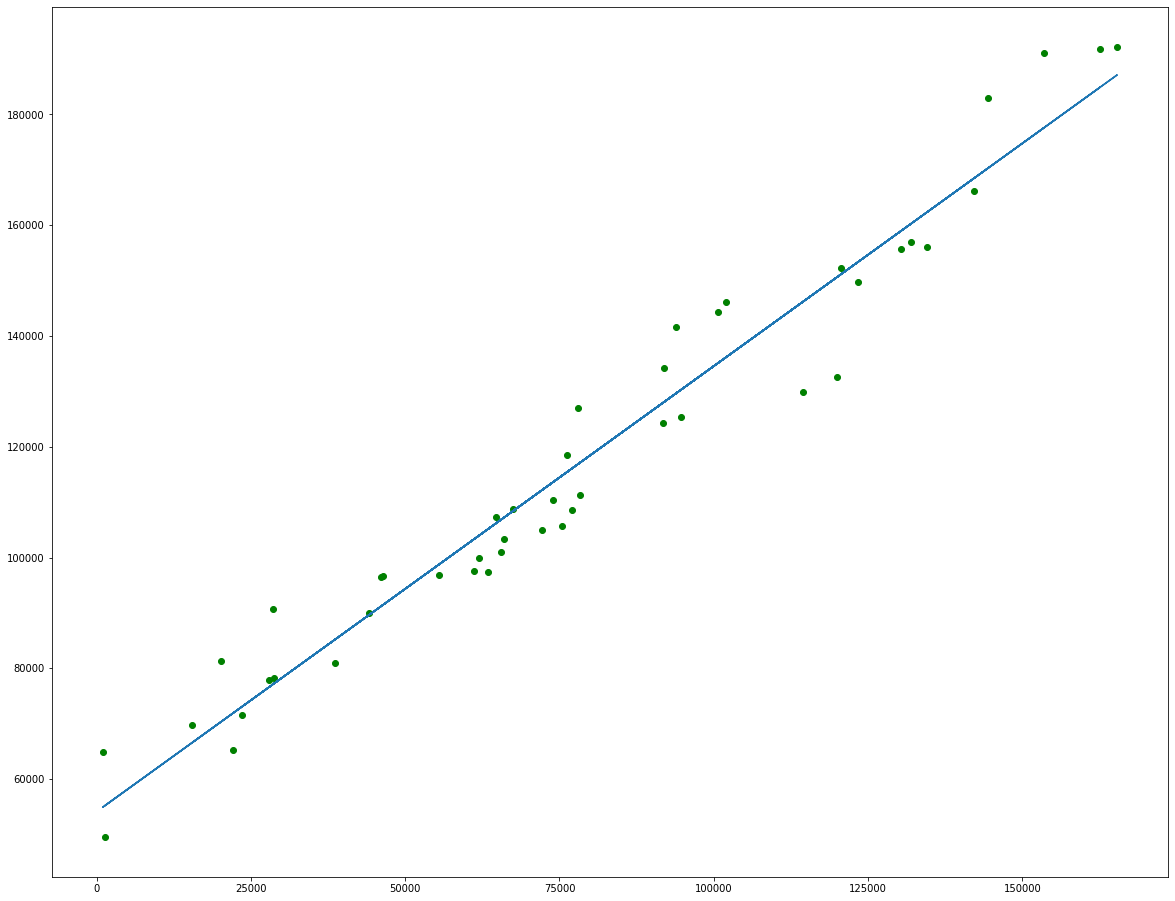

In [19]:
plt.figure(figsize=(20,16))
x_rd = df.iloc[:, 0]
y = df.iloc[:, -1]
plot_regression(x_rd, y, "go")

## Evaluasi Kecocokan Model RD-Profit

In [20]:
x_rd = df.iloc[:, 0]
y = df.iloc[:, -1]
model = make_model(x_rd, y)
y_pred = model(x_rd) 
y_mean = y.mean()

def find_SSE(y_hat,y):
    hasil = 0
    for i in range(len(y_hat)):
        err = y_hat.iloc[i] - y.iloc[i]
        hasil+= pow(err,2)
    return hasil

def find_SSR(y_hat,y_mean):
    hasil = 0
    for i in range(len(y_hat)):
        err = y_hat.iloc[i] - y_mean
        hasil+= pow(err,2)
    return hasil

def find_SST(y,y_mean):
    hasil = 0
    for i in range(len(y)):
        err = y.iloc[i] - y_mean
        hasil+= pow(err,2)
    return hasil

def find_r_squared(sse,sst):
    return round(1 - (sse/sst),4)

def IsApproximatelyEqual(x, y, epsilon):
    if -epsilon <= x - y <= epsilon:
        return True

    if -epsilon <= x <= epsilon or -epsilon <= y <= epsilon:
        return False

    return (-epsilon <= (x - y) / x <= epsilon or -epsilon <= (x - y) / y <= epsilon)

sse = find_SSE(y_pred,y)
ssr = find_SSR(y_pred,y_mean)
sst = find_SST(y,y_mean)
r_squared = find_r_squared(sse,sst)
print('Kecocokan Model Hubungan R&D - Profit\n')
print(f'Sum of Square Error (SSE) = {sse}')
print(f'Sum of Square Regression (SSE) = {ssr}')
print(f'Sum of Square Total (SST) = {sst}\n')
print('SSE + SSR = SST')
print(sse,"+",ssr,"=",sst)
is_valid = IsApproximatelyEqual(sse+ssr,sst,10**-6)
assert(is_valid)
print()
print(f'R² = {r_squared*100}%')

Kecocokan Model Hubungan R&D - Profit

Sum of Square Error (SSE) = 2565963574.9603853
Sum of Square Regression (SSE) = 55624521277.59975
Sum of Square Total (SST) = 58190484852.560135

SSE + SSR = SST
2565963574.9603853 + 55624521277.59975 = 58190484852.560135

R² = 95.59%


# Analisa Kategori per-State (Marketing)

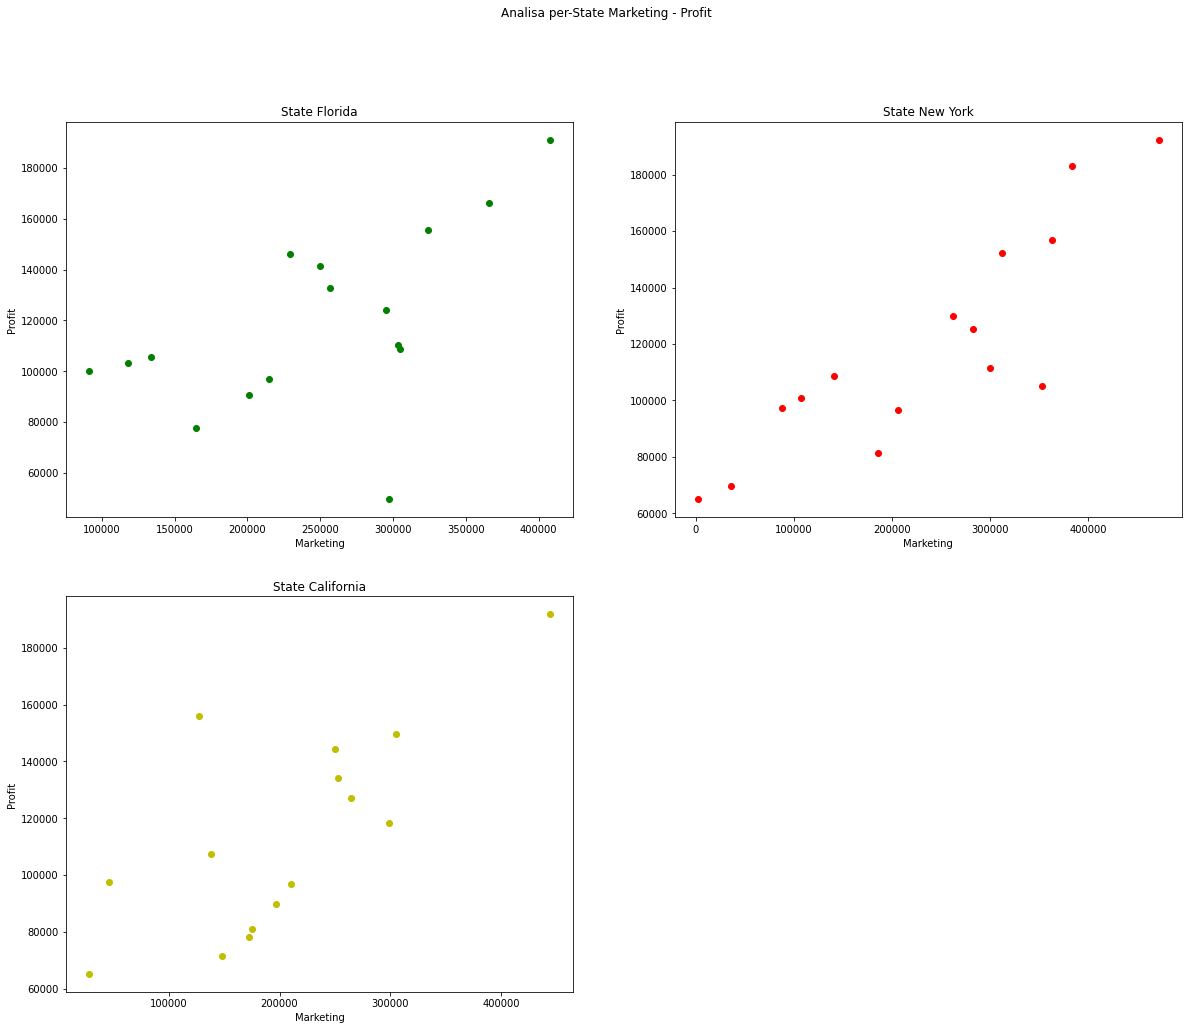

In [21]:
df_florida = df[df["State"]=="Florida"]
df_new_york = df[df["State"]=="New York"]
df_california = df[df["State"]=="California"]

marketing_florida = df_florida["Marketing Spend"]
profit_florida = df_florida["Profit"]

marketing_new_york = df_new_york["Marketing Spend"]
profit_new_york = df_new_york["Profit"]

marketing_california = df_california["Marketing Spend"]
profit_california = df_california["Profit"]

plt.figure(figsize=(20,16))
plt.suptitle("Analisa per-State Marketing - Profit")

plt.subplot(221)
plt.title("State Florida")
plt.xlabel('Marketing')
plt.ylabel('Profit')
plt.plot(marketing_florida,profit_florida,'go')


plt.subplot(222)
plt.title("State New York")
plt.xlabel('Marketing')
plt.ylabel('Profit')
plt.plot(marketing_new_york,profit_new_york,'ro')


plt.subplot(223)
plt.title("State California")
plt.xlabel('Marketing')
plt.ylabel('Profit')
plt.plot(marketing_california,profit_california,'yo')
plt.show()

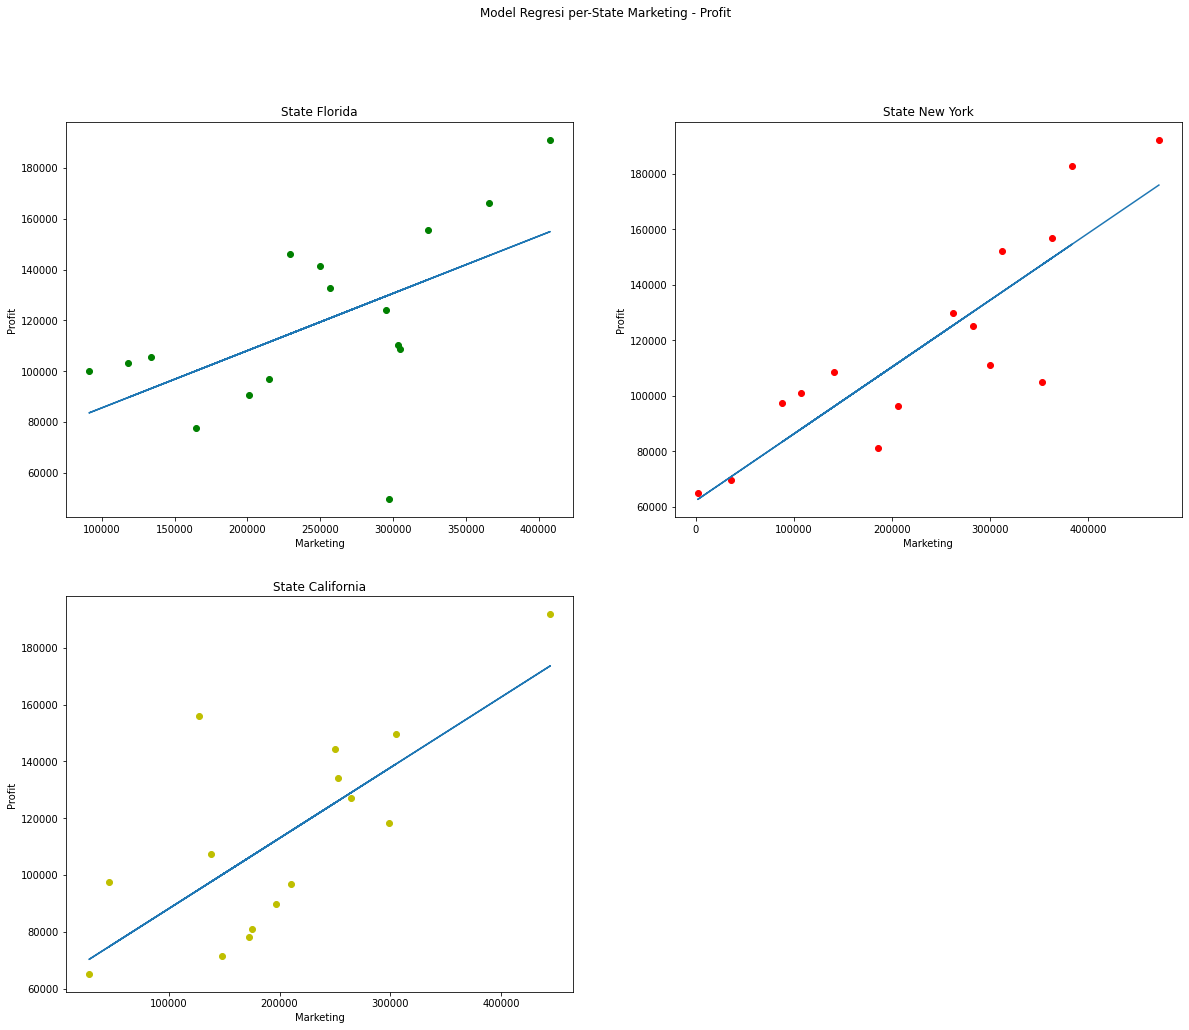

In [22]:
plt.figure(figsize=(20,16))
plt.suptitle("Model Regresi per-State Marketing - Profit")

plt.subplot(221)
plt.title("State Florida")
plt.xlabel('Marketing')
plt.ylabel('Profit')
plot_regression(marketing_florida,profit_florida,'go')



plt.subplot(222)
plt.title("State New York")
plt.xlabel('Marketing')
plt.ylabel('Profit')
plot_regression(marketing_new_york,profit_new_york,'ro')



plt.subplot(223)
plt.title("State California")
plt.xlabel('Marketing')
plt.ylabel('Profit')
plot_regression(marketing_california,profit_california,'yo')

## Evaluasi Kecocokan Model per-State (Marketing - Profit)

### Evaluasi Secara Keseluruhan

In [23]:
x_mar = df.iloc[:, 2]
y = df.iloc[:, -1]
model = make_model(x_mar, y)
y_pred = model(x_mar) 
y_mean = y.mean()

sse = find_SSE(y_pred,y)
ssr = find_SSR(y_pred,y_mean)
sst = find_SST(y,y_mean)
r_squared = find_r_squared(sse,sst)
print('Kecocokan Model Hubungan Marketing - Profit\n')
print(f'Sum of Square Error (SSE) = {sse}')
print(f'Sum of Square Regression (SSE) = {ssr}')
print(f'Sum of Square Total (SST) = {sst}\n')
print('SSE + SSR = SST')
print(sse,"+",ssr,"=",sst)
is_valid = IsApproximatelyEqual(sse+ssr,sst,10**-6)
assert(is_valid)
print()
print(f'R² = {r_squared*100}%')

Kecocokan Model Hubungan Marketing - Profit

Sum of Square Error (SSE) = 26987046986.177666
Sum of Square Regression (SSE) = 31203437866.382477
Sum of Square Total (SST) = 58190484852.560135

SSE + SSR = SST
26987046986.177666 + 31203437866.382477 = 58190484852.560135

R² = 53.620000000000005%


### Evaluasi State Florida

In [24]:
x_mar = marketing_florida
y = profit_florida
model = make_model(x_mar, y)
y_pred = model(x_mar) 
y_mean = y.mean()

sse = find_SSE(y_pred,y)
ssr = find_SSR(y_pred,y_mean)
sst = find_SST(y,y_mean)
r_squared = find_r_squared(sse,sst)
print('Kecocokan Model Hubungan Marketing - Profit State Florida\n')
print(f'Sum of Square Error (SSE) = {sse}')
print(f'Sum of Square Regression (SSE) = {ssr}')
print(f'Sum of Square Total (SST) = {sst}\n')
print('SSE + SSR = SST')
print(sse,"+",ssr,"=",sst)
is_valid = IsApproximatelyEqual(sse+ssr,sst,10**-6)
assert(is_valid)
print()
print(f'R² = {r_squared*100}%')

Kecocokan Model Hubungan Marketing - Profit State Florida

Sum of Square Error (SSE) = 12849889664.174088
Sum of Square Regression (SSE) = 6166353201.718111
Sum of Square Total (SST) = 19016242865.892197

SSE + SSR = SST
12849889664.174088 + 6166353201.718111 = 19016242865.892197

R² = 32.43%


### Evaluasi State New York

In [25]:
x_mar = marketing_new_york
y = profit_new_york
model = make_model(x_mar, y)
y_pred = model(x_mar) 
y_mean = y.mean()

sse = find_SSE(y_pred,y)
ssr = find_SSR(y_pred,y_mean)
sst = find_SST(y,y_mean)
r_squared = find_r_squared(sse,sst)
print('Kecocokan Model Hubungan Marketing - Profit State New York\n')
print(f'Sum of Square Error (SSE) = {sse}')
print(f'Sum of Square Regression (SSE) = {ssr}')
print(f'Sum of Square Total (SST) = {sst}\n')
print('SSE + SSR = SST')
print(sse,"+",ssr,"=",sst)
is_valid = IsApproximatelyEqual(sse+ssr,sst,10**-6)
assert(is_valid)
print()
print(f'R² = {r_squared*100}%')

Kecocokan Model Hubungan Marketing - Profit State New York

Sum of Square Error (SSE) = 5134092501.420339
Sum of Square Regression (SSE) = 15449936068.655422
Sum of Square Total (SST) = 20584028570.075768

SSE + SSR = SST
5134092501.420339 + 15449936068.655422 = 20584028570.075768

R² = 75.06%


### Evaluasi State California

In [26]:
x_mar = marketing_california
y = profit_california
model = make_model(x_mar, y)
y_pred = model(x_mar) 
y_mean = y.mean()

sse = find_SSE(y_pred,y)
ssr = find_SSR(y_pred,y_mean)
sst = find_SST(y,y_mean)
r_squared = find_r_squared(sse,sst)
print('Kecocokan Model Hubungan Marketing - Profit State California\n')
print(f'Sum of Square Error (SSE) = {sse}')
print(f'Sum of Square Regression (SSE) = {ssr}')
print(f'Sum of Square Total (SST) = {sst}\n')
print('SSE + SSR = SST')
print(sse,"+",ssr,"=",sst)
is_valid = IsApproximatelyEqual(sse+ssr,sst,10**-6)
assert(is_valid)
print()
print(f'R² = {r_squared*100}%')

Kecocokan Model Hubungan Marketing - Profit State California

Sum of Square Error (SSE) = 8727508532.176632
Sum of Square Regression (SSE) = 9644601480.104303
Sum of Square Total (SST) = 18372110012.280933

SSE + SSR = SST
8727508532.176632 + 9644601480.104303 = 18372110012.280933

R² = 52.5%


In [27]:
# kaitan administrasi dengan profit

def find_correlation_coefficient(x, y):
    x_bar = x.mean()
    y_bar = y.mean()
    r = sum((x - x_bar)*(y - y_bar)) / (sum((x - x_bar) ** 2) * (sum((y - y_bar) ** 2))) ** 0.5
    return r

r_rnd = find_correlation_coefficient(df.iloc[:, 0], df.iloc[:, -1])
r_adm = find_correlation_coefficient(df.iloc[:, 1], df.iloc[:, -1])
r_mar = find_correlation_coefficient(df.iloc[:, 2], df.iloc[:, -1])
print("Koefisien korelasi dari RnD Spend dan Profit adalah:", r_rnd)
print("Koefisien korelasi dari Administration dan Profit adalah:", r_adm)
print("Koefisien korelasi dari Marketing dan Profit adalah:", r_mar)

Koefisien korelasi dari RnD Spend dan Profit adalah: 0.9777034670669674
Koefisien korelasi dari Administration dan Profit adalah: 0.13507591841115776
Koefisien korelasi dari Marketing dan Profit adalah: 0.732276732172417


<h3><b>Karena koefisien korelasi dari Administration dan profit hanya 0.135, maka kami menyimpulkan bahwa tidak ada kaitan secara langsung antara dana administrasi dengan profit.<b></h3>

# Bukti Bahwa Fitur Administrasi Tidak Berhubungan dengan Profit

In [28]:
x_admin = df.iloc[:,1]
y = df.iloc[:,-1]
model = make_model(x_admin, y)
y_pred = model(x_admin) 
y_mean = y.mean()

sse = find_SSE(y_pred,y)
ssr = find_SSR(y_pred,y_mean)
sst = find_SST(y,y_mean)
r_squared = find_r_squared(sse,sst)
print('Kecocokan Model Hubungan Administration - Profit \n')
print(f'Sum of Square Error (SSE) = {sse}')
print(f'Sum of Square Regression (SSE) = {ssr}')
print(f'Sum of Square Total (SST) = {sst}\n')
print('SSE + SSR = SST')
print(sse,"+",ssr,"=",sst)
is_valid = IsApproximatelyEqual(sse+ssr,sst,10**-6)
assert(is_valid)
print()
print(f'R² = {r_squared*100}%')

Kecocokan Model Hubungan Administration - Profit 

Sum of Square Error (SSE) = 57128770143.863525
Sum of Square Regression (SSE) = 1061714708.696604
Sum of Square Total (SST) = 58190484852.560135

SSE + SSR = SST
57128770143.863525 + 1061714708.696604 = 58190484852.560135

R² = 1.82%
